> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [32]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
df_noshow=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df_noshow.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [33]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [34]:
df_noshow.info()
df_noshow.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(110527, 14)

In [35]:
df_noshow.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [36]:
df_noshow.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [37]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [38]:
#Renaming Column Labels
df_noshow=df_noshow.rename(columns={'PatientId':'PatientID','Hipertension':'Hypertension','Handcap':'Handicap','SMS_received':'SMS_Received','No-show':'No_Show'})


In [39]:
#Convert dataype of "PatientId" column from float to int
df_noshow['PatientID']=pd.to_numeric(df_noshow['PatientID'],downcast='integer')
df_noshow['PatientID'].dtype


dtype('int64')

In [40]:
#Converting datatype Of ScheduledDay and AppointmentDay from int to datetime
df_noshow['ScheduledDay']=pd.to_datetime(df_noshow['ScheduledDay'])
df_noshow['AppointmentDay']=pd.to_datetime(df_noshow['AppointmentDay'])
df_noshow.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_Received      110527 non-null int64
No_Show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [41]:
df_noshow['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [42]:
#Droppping rows containing Age less than 0
df_noshow= df_noshow.drop(df_noshow[df_noshow.Age<0].index)
df_noshow['Age'].unique()
df_noshow.shape

(110526, 14)

In [43]:
sum(df_noshow.duplicated())

0

In [53]:
#Dropping duplicates 
df_noshow.drop_duplicates(['PatientID','ScheduledDay'], keep='first',inplace=True)
df_noshow.shape

(109192, 14)

In [45]:
## converting no-show status to numbers no-show =0 , show =1
df_noshow['No_Show']=df_noshow['No_Show'].str.replace('No' , '1')
df_noshow['No_Show']=df_noshow['No_Show'].str.replace('Yes' , '0')
df_noshow['No_Show']=df_noshow['No_Show'].astype(int)

Text(0.5,1,'No.Of Patients having Scholarship')

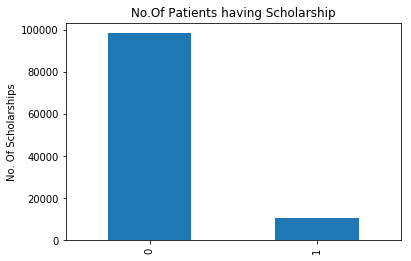

In [46]:
df_noshow.Scholarship.value_counts().plot(kind='bar')
plt.ylabel('No. Of Scholarships')
plt.title('No.Of Patients having Scholarship')


Text(0,0.5,'Scholarship')

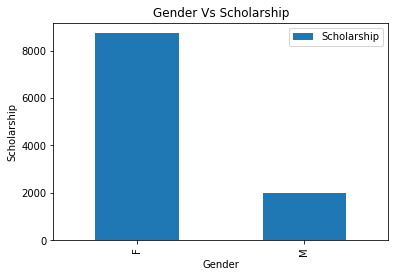

In [47]:
group= df_noshow[['Gender','Scholarship']]
gender_group = group.groupby(['Gender']).sum()
gender_group.plot(kind='bar',title="Gender Vs Scholarship")
plt.ylabel('Scholarship')

Text(0.5,1,'Number of Appointments per patient')

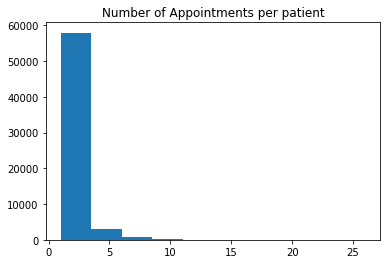

In [48]:
patient_appointment = df_noshow.groupby('PatientID')['AppointmentDay'].nunique()
plt.hist(patient_appointment);
plt.title("Number of Appointments per patient")


In [49]:
patient_appointment.mean()

1.6477819347942277

In [50]:
df_noshow.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
count,1.091920e+05,1.091920e+05,109192.000000,109192.000000,109192.000000,109192.000000,109192.000000,109192.000000,109192.000000,109192.000000
mean,1.475127e+14,5.675753e+06,37.097351,0.098231,0.197377,0.071864,0.030497,0.022199,0.322872,0.799793
std,2.560826e+14,7.116156e+04,23.140676,0.297628,0.398021,0.258264,0.171950,0.161109,0.467576,0.400157
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.176525e+12,5.640751e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.172600e+13,5.680910e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439468e+13,5.725951e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


        No_Show
Gender         
F         56660
M         30671


Text(0,0.5,'No_Show')

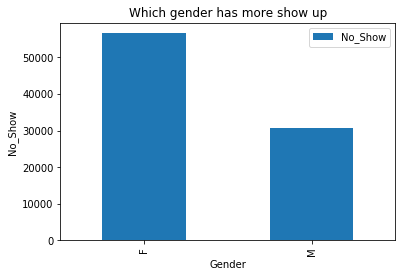

In [51]:
group=df_noshow[['Gender','No_Show']] 
Gender_noshow=group.groupby(['Gender']).sum()
print(Gender_noshow)
Gender_noshow.plot(kind='bar',title='Which gender has more show up')
plt.ylabel('No_Show')

In [54]:
#Not sure whether histogram or bar is accurate.Not able to mark x-axis labels correctly.How to mark bar plot with a range of values(buckets) 
#like 0-20,20-40 for x-axis

SyntaxError: invalid syntax (<ipython-input-54-352fde79dfbc>, line 2)

Text(0,0.5,'No_Show')

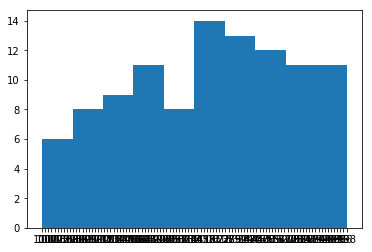

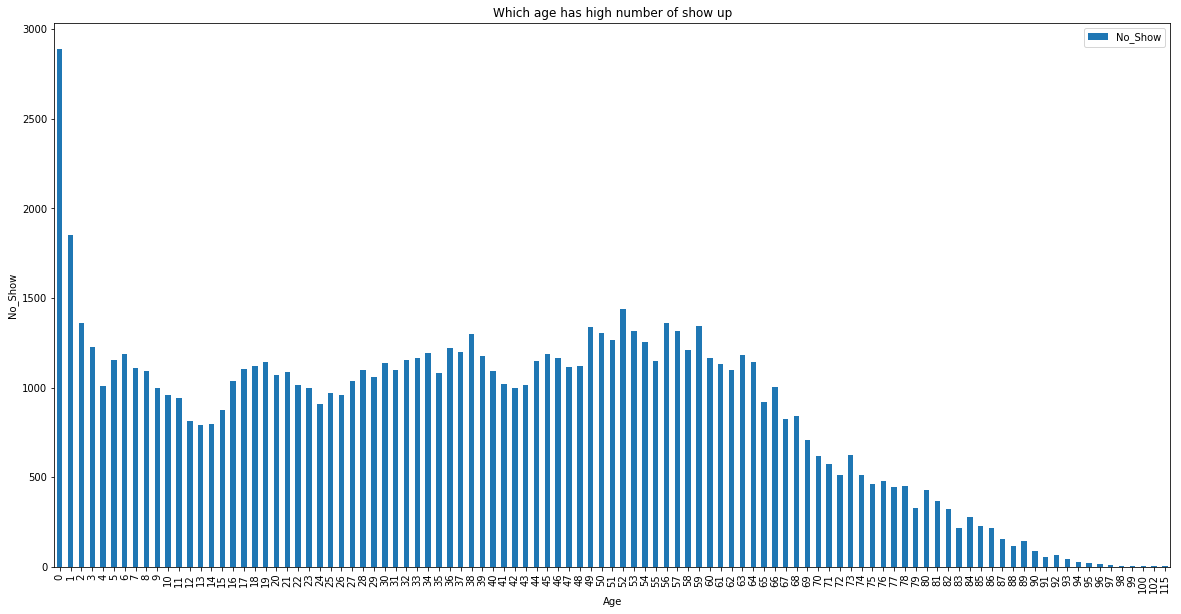

In [55]:
group=df_noshow[['Age','No_Show']]
Age_noshow=group.groupby(['Age']).sum()
#bins=[0,20,40,60,80,100,120]
plt.hist(Age_noshow,bins=10)
Age_noshow.plot(kind='bar',figsize=(20,10),title='Which age has high number of show up')
plt.ylabel('No_Show')

            No_Show
Alcoholism         
0             84663
1              2668


Text(0,0.5,'No_Show')

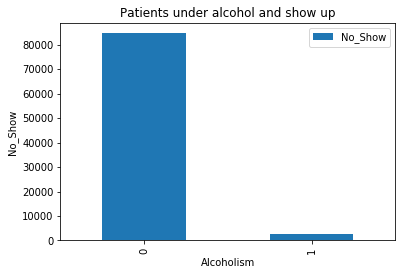

In [56]:
group=df_noshow[['Alcoholism','No_Show']]
Alcohol_noshow=group.groupby(['Alcoholism']).sum()
print(Alcohol_noshow)
Alcohol_noshow.plot(kind='bar',title="Patients under alcohol and show up")
plt.ylabel('No_Show')

          No_Show
Diabetes         
0           80894
1            6437


Text(0,0.5,'No_Show')

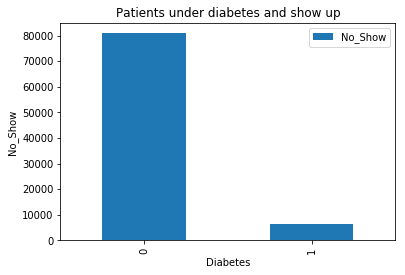

In [57]:
group=df_noshow[['Diabetes','No_Show']]
Diabetes_noshow=group.groupby(['Diabetes']).sum()
print(Diabetes_noshow)
Diabetes_noshow.plot(kind='bar',title="Patients under diabetes and show up")
plt.ylabel('No_Show')

Text(0,0.5,'No_Show')

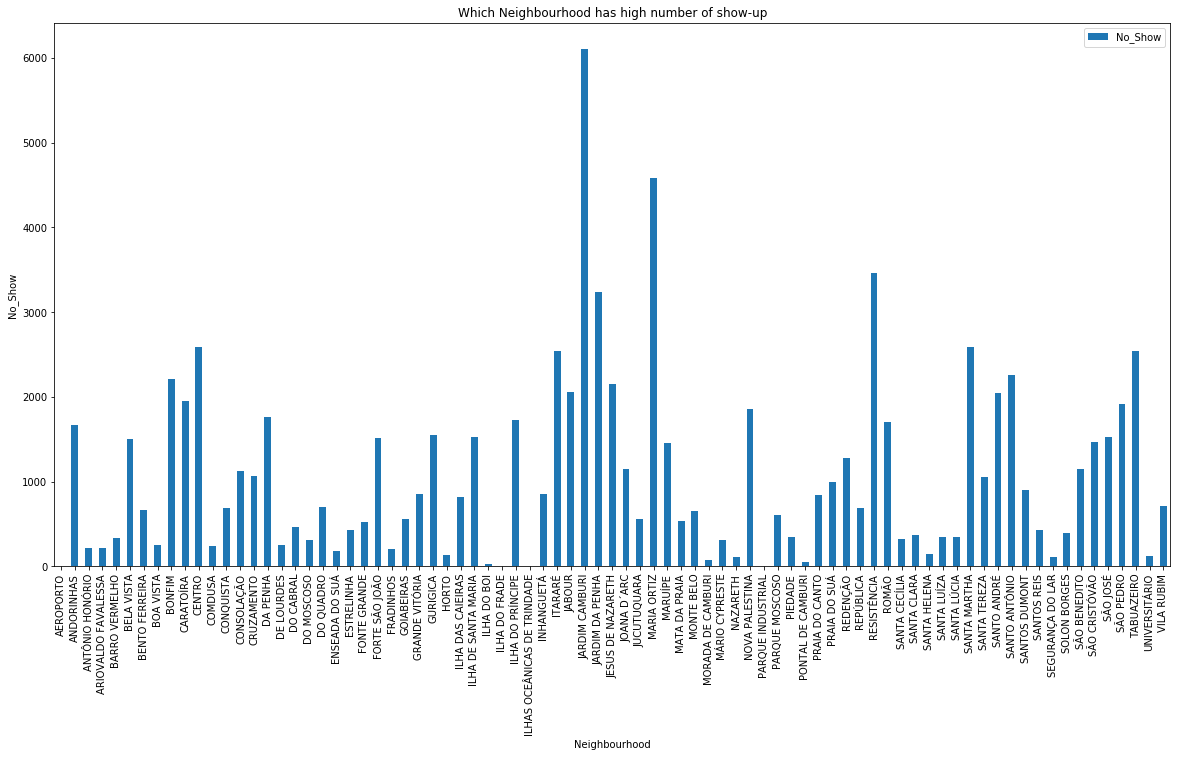

In [58]:
group=df_noshow[['Neighbourhood','No_Show']]
Neighbourhood_noshow=group.groupby(['Neighbourhood']).sum()
Neighbourhood_noshow.plot(kind='bar',figsize=(20,10),title='Which Neighbourhood has high number of show-up')
plt.ylabel('No_Show')

In [ ]:
def prop_disease_neighborhood(disease, neighbourhood):
    target = df_noshow.disease.where(df_noshow[disease] == '1')
    neighborhood_count_by_disease = target.where(df_noshow['neighbourhood'] == neighbourhood).count()
    neighbourhood_total = df_noshow.where(df_noshow['neighbourhood'] == neighbourhood).count()
    proportion = neighborhood_count_by_disease / neighbourhood_total * 100
    return proportion

In [ ]:
disease=df_noshow['Hypertension','Diabetes','Alcoholism']
neighbourhood=df_noshow['Neighbourhood']
for name in neighbourhood:
    proportion=prop_disease_neighborhood(disease, neighbourhood)


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])